In [4]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

In [15]:
def nonlinear_bisection(func, x_left, x_right, error):
    y_left = func(x_left)
    y_right = func(x_right)
    if y_left * y_right >= 0:
        raise Exception('invalid arguments: x_left * x_right should be < 0')
    elif x_left >= x_right:
        raise Exception('invalid arguments: x_left should be < x_right')
    x_new = (x_left + x_right) / 2.0
    y_new = func(x_new)
    i = 0
    i_max = 1000   # 最大試行回数（無限ループ回避）
    while math.fabs(func(x_new)) > error and i < i_max:
        x_new = (x_left + x_right) / 2.0
        y_new = func(x_new)
        if y_new * y_left > 0:
            x_left = x_new
            y_left = y_new
        else:
            x_right = x_new
            y_right = y_new
        i += 1
    return x_new, i

def f1(x):
    return (x + 3.124) * (x - 1.013) * (x - 2.726)

print(nonlinear_bisection(f1, -100, 0, 1e-8))
print(nonlinear_bisection(f1, 0, 1.5, 1e-8))
print(nonlinear_bisection(f1, 2, 4, 1e-8))

(-3.1239999996614642, 36)
(1.0130000011995435, 29)
(2.7259999997913837, 29)


(-3.123999999999906, 13)
(1.0130000000000006, 5)
(2.7260000000000013, 6)


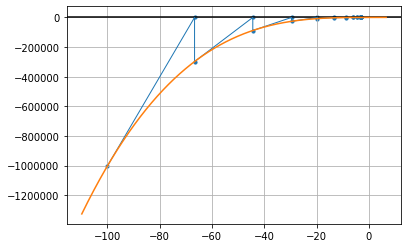

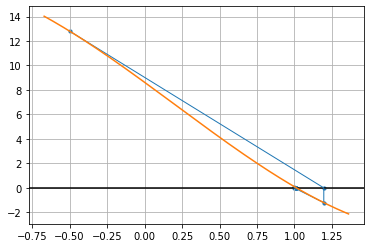

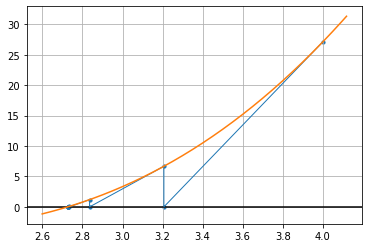

In [59]:
def nonlinear_newton(func, x0, error, draw_graph = False):
    dx = 1e-6
    x = x0
    y = func(x)
    i = 0
    i_max = 1000   # 最大試行回数（無限ループ回避）
    x_log = [x]
    y_log = [y]
    while math.fabs(y) > error and i < i_max:
        a = (func(x+dx) - y) / dx   # 接線 Y = a(X - x) + y の傾き
        x = x - y / a
        y = func(x)
        x_log.append(x)
        y_log.append(0)
        x_log.append(x)
        y_log.append(y)
        i += 1
    if draw_graph:
        fig, ax = plt.subplots()
        ax.grid()
        ax.axhline(0, color='black')
        ax.plot(x_log, y_log, linewidth=1)
        ax.scatter(x_log, y_log, s=10)
        x_log_min = min(x_log)
        x_log_max = max(x_log)
        width = x_log_max - x_log_min
        x_graph = np.arange(x_log_min - width * 0.1, x_log_max + width * 0.1, 0.01)
        y_graph = [func(x) for x in x_graph]
        ax.plot(x_graph, y_graph)
    return x, i

print(nonlinear_newton(f1, -100, 1e-8, True))
print(nonlinear_newton(f1, -0.5, 1e-8, True))
print(nonlinear_newton(f1, 4, 1e-8, True))